In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('User_Data.csv')
x = data.iloc[:, 2:4].values
y = data.iloc[:, 4].values
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


C:\Users\mike\AppData\Local\Temp\ipykernel_236\1070695250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EstimatedSalary'], kde=False, bins=10)


<Axes: xlabel='EstimatedSalary'>

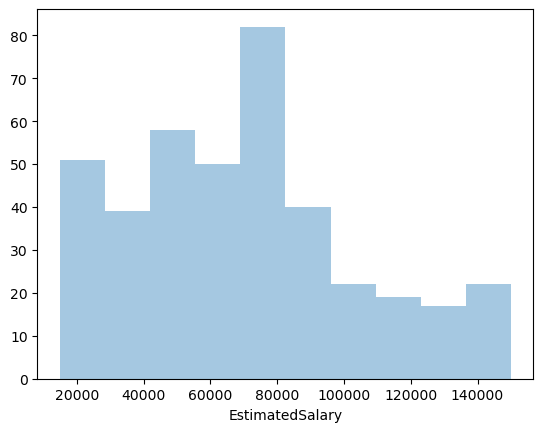

In [3]:
sns.distplot(data['EstimatedSalary'], kde=False, bins=10)

<Axes: xlabel='count', ylabel='EstimatedSalary'>

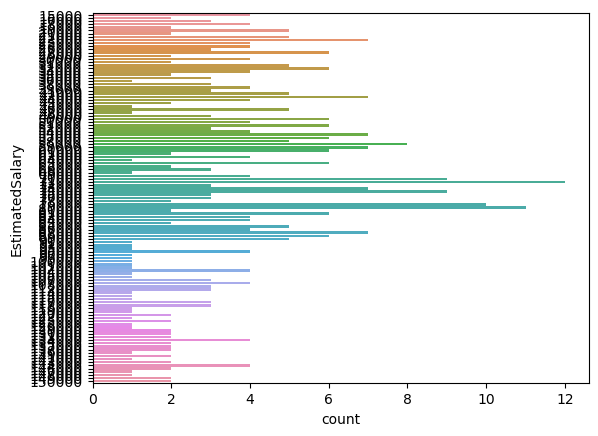

In [4]:
sns.countplot(y='EstimatedSalary',  data=data)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

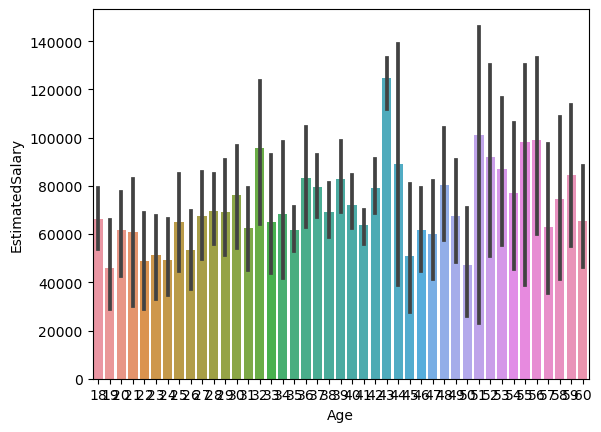

In [5]:
sns.barplot(x='Age', y='EstimatedSalary', data=data)

C:\Users\mike\AppData\Local\Temp\ipykernel_236\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

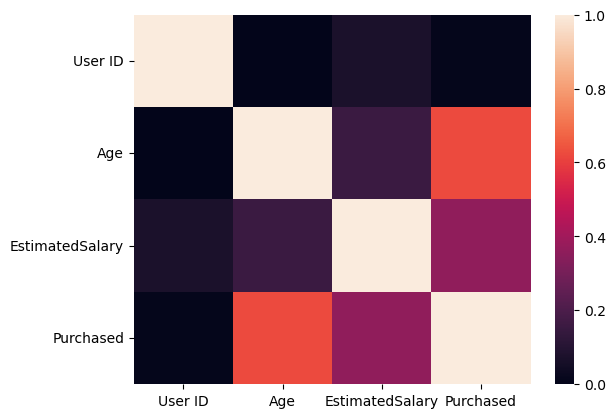

In [6]:
sns.heatmap(data.corr())

In [7]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [8]:
#Split/Divide the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=100)


In [9]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
x_train = std_sc.fit_transform(x_train)
x_test = std_sc.fit_transform(x_test)

In [10]:
x_train

array([[-2.50017186e-01, -9.30520479e-01],
       [ 4.19671705e-01,  2.54496505e-01],
       [-2.50017186e-01, -3.66226677e-01],
       [-2.50017186e-01,  2.87789839e-02],
       [ 1.08936060e+00, -9.02305789e-01],
       [-1.01537592e+00, -3.94441367e-01],
       [ 7.06681230e-01, -1.38195552e+00],
       [ 9.93690755e-01, -1.18445269e+00],
       [ 1.08936060e+00,  4.23784645e-01],
       [-8.24036236e-01,  2.54496505e-01],
       [ 1.47203996e+00,  9.31649067e-01],
       [-1.01537592e+00, -1.43838490e+00],
       [-6.32696553e-01,  1.41637744e-01],
       [-7.28366394e-01, -2.53367917e-01],
       [ 6.11011389e-01,  1.91916322e+00],
       [-7.28366394e-01,  2.54496505e-01],
       [-8.24036236e-01,  1.13423054e-01],
       [ 1.95038917e+00, -9.30520479e-01],
       [-1.01537592e+00,  1.86273384e+00],
       [ 1.95038917e+00,  8.47004996e-01],
       [ 3.69923388e-02,  1.15736659e+00],
       [-1.39805529e+00, -1.43838490e+00],
       [-3.45687028e-01,  1.24201066e+00],
       [-1.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
#Predict the results
y_pred = classifier.predict(x_test)
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
#df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
df

,Actual Values,Predicted Values
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
95,0,0
96,1,1
97,0,0
98,0,0


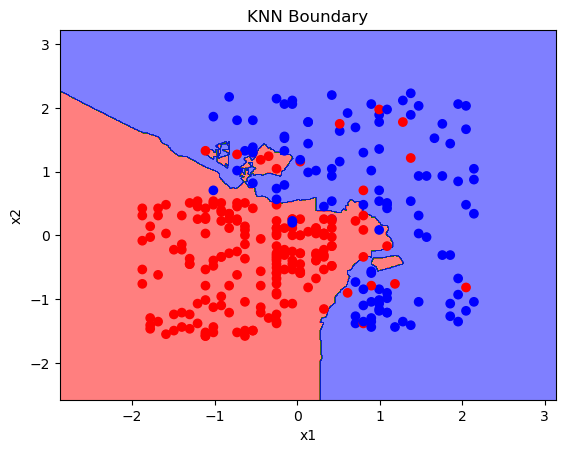

In [14]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

x_set, y_set = x_train, y_train

# Define the range for x1 and x2
x1_range = np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01)
x2_range = np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01)

# Create a meshgrid
x1, x2 = np.meshgrid(x1_range, x2_range)

# Predict the classes for each point in the meshgrid
predicted_classes = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

# Create a colormap for the plot
cmap = ListedColormap(['red', 'green', 'blue'])

# Plot the decision boundary
plt.contourf(x1, x2, predicted_classes, alpha=0.5, cmap=cmap)

# Scatter plot the training data points
plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, cmap=cmap)

# Set the limits for the x and y axes
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN Boundary')

# Show the plot
plt.show()


In [15]:
#Making A confusion Matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[61,  5],
       [ 4, 30]], dtype=int64)

In [ ]:
#61 + 30 = 91 correct predictions, 5 + 4 = 9 wrong predictions.
